In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
corr_matrix = df.corr()
corr_matrix['Purchase'].sort_values(ascending=False)

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64

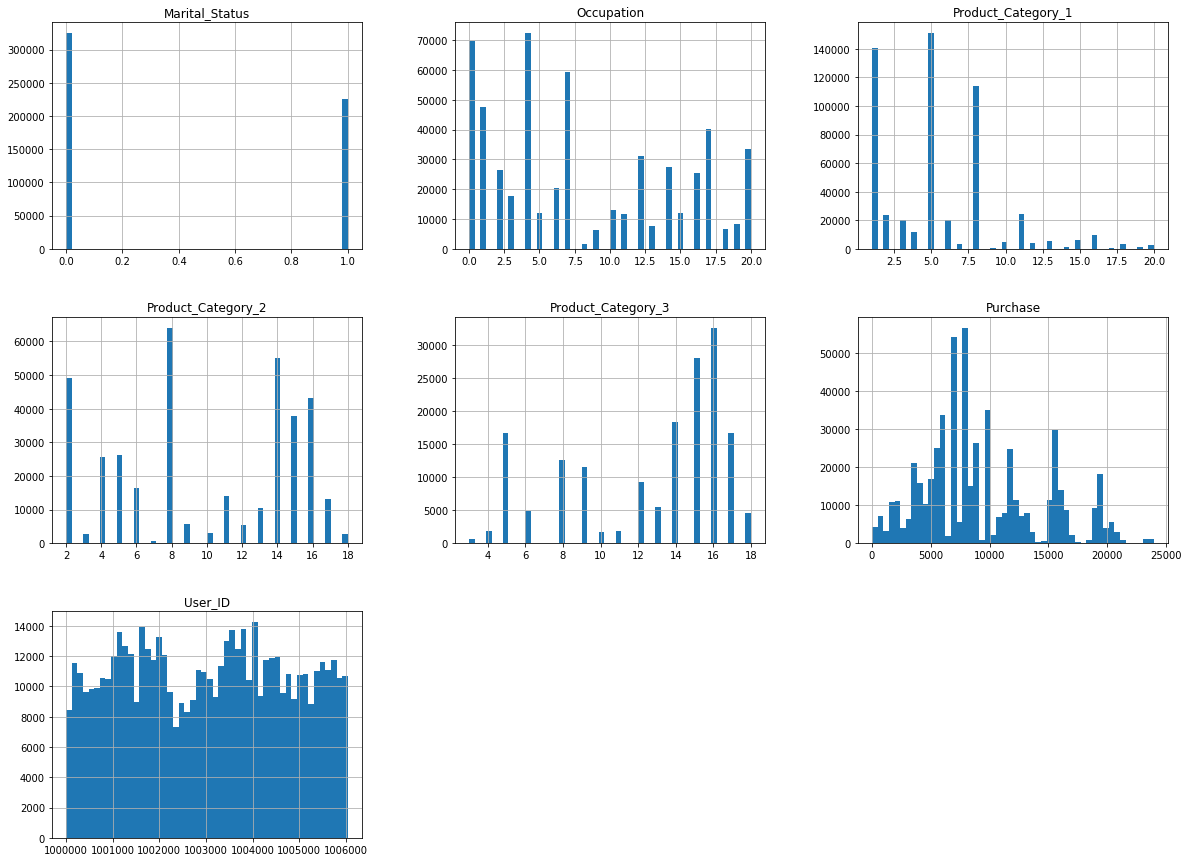

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\Peeyush\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


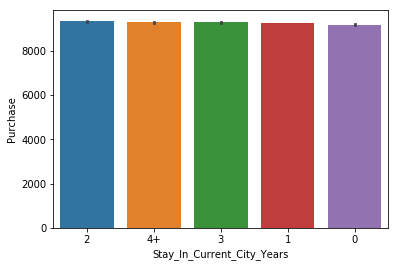

In [9]:
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=df)

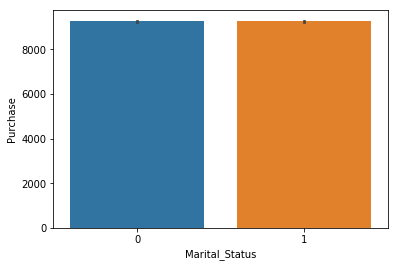

In [10]:
sns.barplot(x='Marital_Status', y='Purchase', data=df)

In [11]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [12]:
df.shape

(550068, 12)

In [13]:
df['Product_Category_1'].value_counts().sort_index()

1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category_1, dtype: int64

In [14]:
df['Product_Category_2'].value_counts().sort_index()

2.0     49217
3.0      2884
4.0     25677
5.0     26235
6.0     16466
7.0       626
8.0     64088
9.0      5693
10.0     3043
11.0    14134
12.0     5528
13.0    10531
14.0    55108
15.0    37855
16.0    43255
17.0    13320
18.0     2770
Name: Product_Category_2, dtype: int64

In [15]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


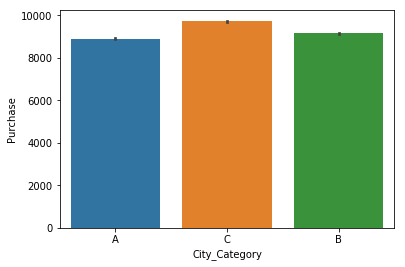

In [16]:
sns.barplot(x='City_Category', y='Purchase', data=df)

In [17]:
df.loc[df['Product_Category_1'] == 9, 'Product_Category_2'].mode().values

array([15.])

In [18]:
for i in df['Product_Category_2'].value_counts().index:
    m=df.loc[df['Product_Category_1'] == i, 'Product_Category_2']
    if len(m.mode().values) > 0:
        m.fillna(m.mode().values[0])

In [19]:
df['Product_Category_2'].isnull().sum()

173638

In [20]:
 df.loc[df['Product_Category_1'] == 2, 'Product_Category_2'].isna().sum()

930

In [21]:
df.loc[df['Product_Category_1'] == i, 'Product_Category_2']

208        NaN
368        NaN
731        NaN
900        NaN
985        NaN
1000       NaN
1009       NaN
1106       NaN
1147       NaN
1186       NaN
1371       NaN
1438       NaN
1571       8.0
1772       NaN
1824       NaN
1916       NaN
1970       NaN
2044       NaN
2070       NaN
2707       NaN
2739       NaN
2797       NaN
2981       8.0
2982       NaN
3075      17.0
3138       NaN
3180       8.0
3270       NaN
3359       NaN
3498       NaN
          ... 
540667     NaN
541053     NaN
541195     NaN
541210     NaN
541588     NaN
541751     NaN
541760     NaN
541953     NaN
542041     NaN
542214     NaN
542376     NaN
542420     NaN
542454     NaN
542455     NaN
542680     NaN
542687     NaN
542709     NaN
542711     NaN
542732     NaN
542761     NaN
542873     NaN
543417     NaN
543930     NaN
544405     NaN
545184     NaN
545415     NaN
545417     NaN
545420     NaN
545482     NaN
545865     NaN
Name: Product_Category_2, Length: 3721, dtype: float64

In [22]:
m.mode()[0]

12.0

In [23]:
d = {}
for i in df['Product_Category_2'].value_counts().index:
    mod = df.loc[df['Product_Category_1'] == i, 'Product_Category_2'].mode()
    if len(mod) > 0:
        d[i] = mod[0]

In [24]:
d.keys()

dict_keys([8.0, 14.0, 2.0, 15.0, 5.0, 4.0, 6.0, 11.0, 13.0, 9.0, 12.0, 10.0, 3.0, 7.0])

In [25]:
d.values()

dict_values([14.0, 16.0, 4.0, 16.0, 8.0, 5.0, 8.0, 15.0, 16.0, 15.0, 14.0, 13.0, 4.0, 12.0])

In [26]:
d

{8.0: 14.0,
 14.0: 16.0,
 2.0: 4.0,
 15.0: 16.0,
 5.0: 8.0,
 4.0: 5.0,
 6.0: 8.0,
 11.0: 15.0,
 13.0: 16.0,
 9.0: 15.0,
 12.0: 14.0,
 10.0: 13.0,
 3.0: 4.0,
 7.0: 12.0}

In [27]:
df1 = df.copy()

In [28]:
df1.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [29]:
for k,v in d.items():
    df1.loc[(df1['Product_Category_1'] == k) & (df1['Product_Category_2'].isnull()),'Product_Category_2'] = v

In [30]:
df1.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             24282
Product_Category_3            383247
Purchase                           0
dtype: int64

In [31]:
df1.loc[df1['Product_Category_2'].isnull(),'Product_Category_1'].value_counts()

16    9828
1     6598
18    3125
20    2550
19    1603
17     578
Name: Product_Category_1, dtype: int64

In [32]:
df1.loc[df1['Product_Category_2'].isnull(),'Product_Category_2'] = 8

In [33]:
data = df1.copy()

In [34]:
df1 = df1.drop(columns=['User_ID', 'Product_ID'], axis=1)

In [35]:
df1 = df1.drop(columns=['Product_Category_3', 'Stay_In_Current_City_Years', 'Marital_Status'])

In [36]:
df1.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [37]:
df1 = pd.get_dummies(df1)

In [38]:
df1.columns

Index(['Occupation', 'Product_Category_1', 'Product_Category_2', 'Purchase',
       'Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A',
       'City_Category_B', 'City_Category_C'],
      dtype='object')

In [39]:
y = df1['Purchase']

In [40]:
y.shape

(550068,)

In [41]:
X = df1.drop(columns=['Purchase'])

In [42]:
X.shape

(550068, 15)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [46]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
model.score(X_test,y_test)

0.12634464568541515

In [48]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

C:\Users\Peeyush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [49]:
## get MSE 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

Mean Squared Error : 9075150.88
R2 Score: 0.64
Mean Absolute Error : 2240.48


In [50]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## Hyperparameters

In [55]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [10, 20, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False, True], 'n_estimators': [3, 10], 'max_depth': [100, 200, 300, 400, 500]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 20, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False, True], 'n_estimators': [3, 10], 'max_depth': [100, 200, 300, 400, 500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [56]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [57]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [58]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3055.5478488897456 {'max_features': 2, 'n_estimators': 10}
3045.754176826073 {'max_features': 2, 'n_estimators': 20}
3043.4680203454805 {'max_features': 2, 'n_estimators': 30}
3035.4753648386277 {'max_features': 4, 'n_estimators': 10}
3027.0028522328716 {'max_features': 4, 'n_estimators': 20}
3026.1444211533835 {'max_features': 4, 'n_estimators': 30}
3025.866779405803 {'max_features': 6, 'n_estimators': 10}
3020.244659142176 {'max_features': 6, 'n_estimators': 20}
3018.5928042064265 {'max_features': 6, 'n_estimators': 30}
3022.037686386863 {'max_features': 8, 'n_estimators': 10}
3018.6527450336603 {'max_features': 8, 'n_estimators': 20}
3017.202594554311 {'max_features': 8, 'n_estimators': 30}
3043.5920896283264 {'bootstrap': False, 'max_depth': 100, 'n_estimators': 3}
3043.3158691615663 {'bootstrap': False, 'max_depth': 100, 'n_estimators': 10}
3043.531049206201 {'bootstrap': False, 'max_depth': 200, 'n_estimators': 3}
3043.3893481342366 {'bootstrap': False, 'max_depth': 200, 'n_estim